In [1]:
name = "IR1_All"

import import_ipynb
import GlobalVariables as common

In [2]:
#user input of some of the variables
common.numberOfHouseholds = 100# int(input("Insert the number of household to create: "))
common.percentageOfNumbAgents = 50# int(input("Insert the percentage of numb agents (from 0 to 100):"))
common.numberOfFirms = 4# int(input("Insert the number of firms to create: "))
common.numberOfCycles = 300# int(input("Insert the number of cycles:"))
common.seed =99# int(input("Insert a seed for random values:"))
common.verbose =False# eval(input("Verbose (True or False):"))
common.network =1# eval(input("Do you want to create a network between the households (True or False):"))
if common.network: 
    common.probabilityOfConnection = 0.15 #float(input("Probability of connection in the network:"))
    
common.unemployment = 1 # eval(input("Do you want to introduce the unemployment modelling:"))

In [3]:
from Environment import *
from Firms import *
from Household import *
from Book import *

if common.unemployment:
    from ActionsU import *
else:
    from Actions import *

importing Jupyter notebook from Environment.ipynb
importing Jupyter notebook from Household.ipynb
importing Jupyter notebook from Firms.ipynb
importing Jupyter notebook from Book.ipynb
importing Jupyter notebook from ActionsU.ipynb


In [4]:
#setting the seed
np.random.seed(seed = common.seed)

In [5]:
# first, creating the environment
environment = Environment()

In [6]:
#then we create the Agents
environment.createAgent("Household", common.numberOfHouseholds)
environment.createAgent("Firm", common.numberOfFirms)
if common.verbose:
    print("Global interest rate for the next cycle is:", common.currentInterestRate)

In [7]:
#if there's a social network
if common.network:
    environment.createBaseGraph()
    #environment.drawBaseGraph(l = 55, h=34, pos = "circular")

In [8]:
#the scheduled actions are done
for cycle in range(common.numberOfCycles):
    environment.cycle( urlOfTheDailySchedule = common.urlOfTheDailySchedule)

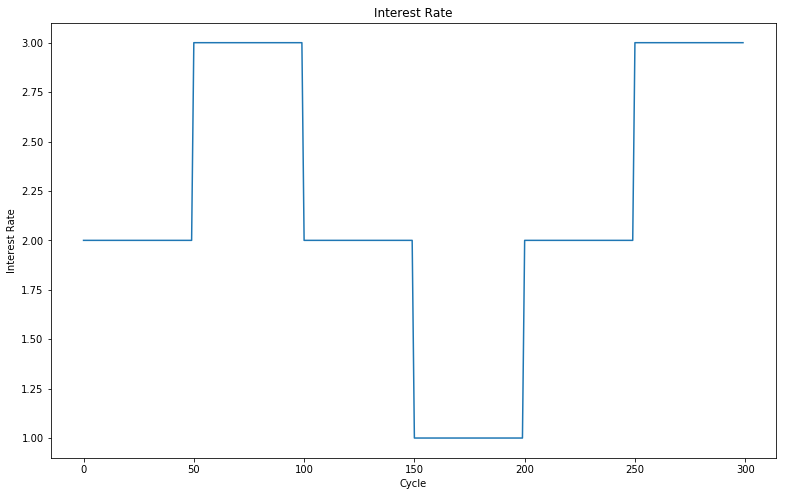

In [9]:
#ir section
interestRateSchedule = pd.read_csv(common.urlOfInterestRateSchedule)
interestRateList = []
for tick in range(common.numberOfCycles):
    stopping = False
    for timeIndex in range(len(interestRateSchedule)):
        tickThreshold = interestRateSchedule.iloc[timeIndex]["Tick"]
        if tick < tickThreshold and stopping == False:
            scheduledInterestRate = interestRateSchedule.iloc[timeIndex]["Rate"]
            if scheduledInterestRate == "High":
                IntRate = 3
            elif scheduledInterestRate == "Medium":
                IntRate = 2
            elif scheduledInterestRate == "Low":
                IntRate = 1
            interestRateList.append(IntRate)
            stopping = True
                    
plt.figure(figsize=(13, 8))
plt.title("Interest Rate")
plt.xlabel("Cycle")
plt.ylabel("Interest Rate")
plt.plot(range(common.numberOfCycles) , interestRateList)
plt.savefig("interestRate_" + str(name))
plt.show()

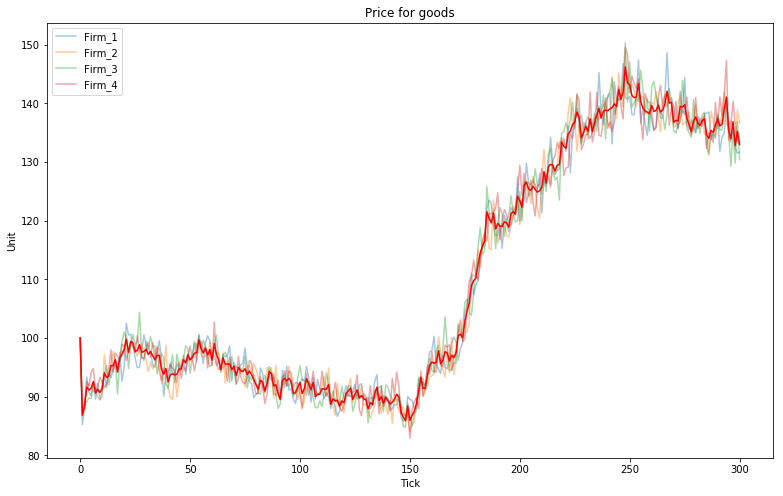

In [10]:
plt.figure(figsize = (13,8))
plt.title("Price for goods")
for f in environment.firmList:
    plt.plot(f.listOfAveragePreviousPrices, alpha = 0.4)
    plt.legend(environment.firmList)
aaa = np.array([firm.listOfAveragePreviousPrices for firm in environment.firmList])
avg = [sum(day)/len(day) for day in aaa.T]
plt.plot(range(len(avg)) , avg, "r")
plt.xlabel("Tick")
plt.ylabel("Unit")
plt.savefig("price_"+ str(name))
plt.show()

/home/gabriele/.conda/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


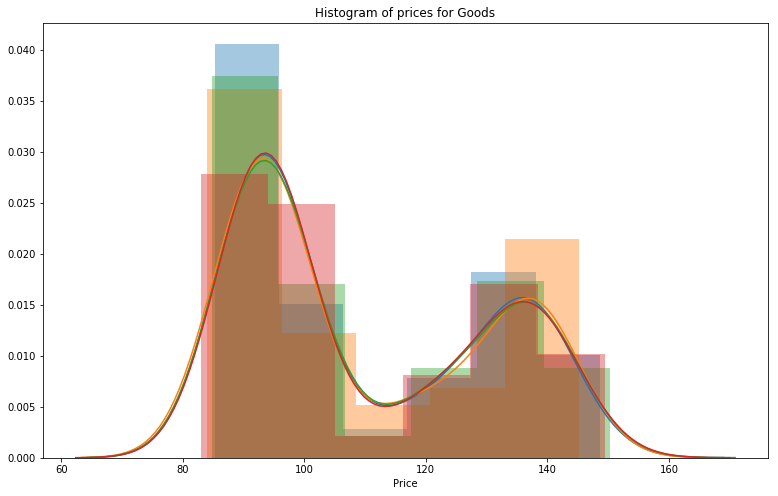

In [11]:
environment.PriceForGoodsHistogram()

/home/gabriele/.conda/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/gabriele/.conda/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/gabriele/.conda/envs/py35/lib/pyth

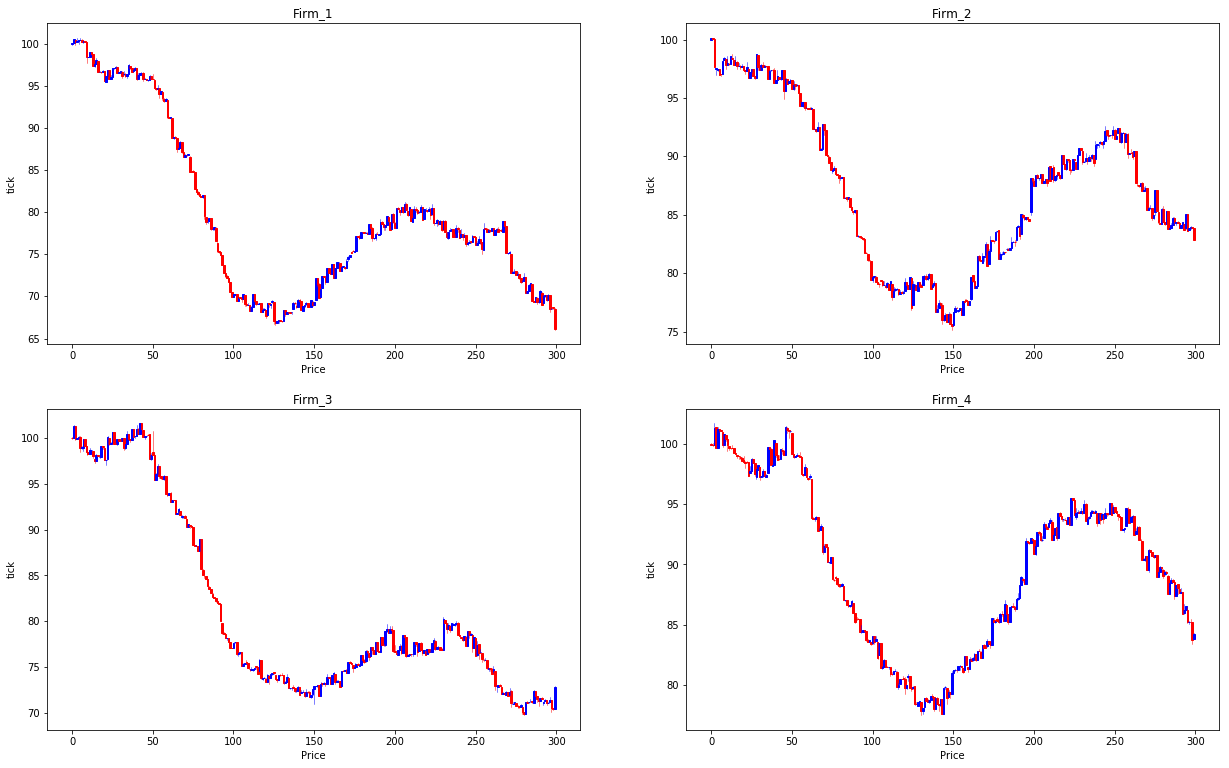

In [12]:
from mpl_finance import candlestick_ohlc

plt.figure(figsize = (21,13))


numberOfBooks = len(environment.bookList)

for index in range(numberOfBooks): 
    plt.subplot(2,2,index+1)
    
    ohlc_values = []
    plt.title(environment.bookList[index])
    plt.ylabel('tick')
    plt.xlabel('Price')
    for tick in range(common.numberOfCycles):
        
        # time, open, high, low, close
        if environment.bookList[index].historicList[tick][0] == None:
            high = 0
        else:
            high = environment.bookList[index].historicList[tick][0]
        if environment.bookList[index].historicList[tick][1] == None:
            low = 0
        else:
            low = environment.bookList[index].historicList[tick][1]
        opn = environment.bookList[index].historicList[tick][2]
        cls = environment.bookList[index].historicList[tick][3]
        ohlc_values.append([tick, opn, high, low , cls])
    #axarr[index].set_ylim([,120])
    candlestick_ohlc(plt.subplot(2,2,index+1), ohlc_values, width=1, colorup='b', colordown='r')
plt.savefig("shares_" + str(name))
plt.show()